In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('creditcard.csv')

In [5]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()

Text(0.5, 1.0, 'Value comparison')

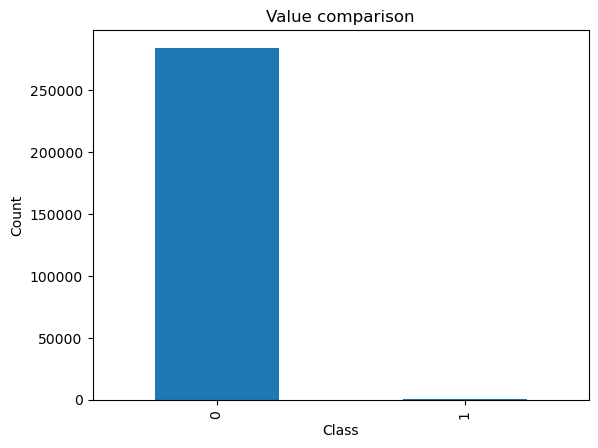

In [6]:
count_classes.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("Value comparison")

In [7]:
fraud_indices_count = len(data[data.Class == 1])
fraud_indices_count

492

In [8]:
fraud_indices = np.array(data[data.Class == 1].index)

In [9]:
fraud_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [10]:
normal_indices = np.array(data[data.Class == 0].index)
random_normal_indices = np.random.choice(normal_indices, fraud_indices_count, replace = False)

In [11]:
us_indices = np.concatenate([random_normal_indices, fraud_indices])

In [13]:
us_data = data.loc[us_indices, :]

In [14]:
us_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
188493,127998.0,1.929812,-1.894272,-0.606898,-0.970828,0.327775,5.007834,-2.589005,1.430543,1.377033,...,-0.275512,0.065304,0.271485,0.754539,-0.476156,0.758701,0.081916,-0.032714,40.00,0
143452,85358.0,-0.433345,-0.044464,0.881472,-0.335297,0.058097,-0.036222,0.440028,0.074917,-2.094448,...,-0.493910,-1.222034,0.321968,-0.372586,-0.648365,0.274130,0.077132,0.131596,84.90,0
77817,57227.0,-1.234899,0.709548,1.758631,0.935709,-0.556698,0.405178,-0.381277,0.423414,0.423529,...,0.128680,0.383612,-0.130957,-0.000853,-0.599033,-0.489793,-0.635359,-0.038403,12.29,0
156258,107677.0,2.006073,-0.051243,-0.103065,0.635257,-0.485990,-0.643535,-0.456077,-0.247203,2.352881,...,-0.322445,-0.440743,0.365953,-0.091144,-0.392375,-0.663083,0.019084,-0.035826,0.12,0
5812,6278.0,-0.769599,-0.496298,1.692291,-0.205076,-1.192421,0.981036,0.475106,0.037825,-0.704853,...,0.502538,1.181273,0.279594,-0.311766,0.327289,0.241969,-0.009076,0.080089,295.29,0


In [15]:
us_data.shape

(984, 31)

In [16]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
data['Normamount'] = StandardScaler().fit_transform(data["Amount"].values.reshape(-1,1))

In [20]:
data = data.drop(['Time', 'Amount'], axis=1)

In [21]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normamount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [22]:
us_data = data.loc[us_indices, :]

In [24]:
us_data = us_data.reset_index(drop=True)

In [25]:
us_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normamount
0,1.929812,-1.894272,-0.606898,-0.970828,0.327775,5.007834,-2.589005,1.430543,1.377033,0.466621,...,-0.275512,0.065304,0.271485,0.754539,-0.476156,0.758701,0.081916,-0.032714,0,-0.193306
1,-0.433345,-0.044464,0.881472,-0.335297,0.058097,-0.036222,0.440028,0.074917,-2.094448,0.684939,...,-0.493910,-1.222034,0.321968,-0.372586,-0.648365,0.274130,0.077132,0.131596,0,-0.013792
2,-1.234899,0.709548,1.758631,0.935709,-0.556698,0.405178,-0.381277,0.423414,0.423529,0.209172,...,0.128680,0.383612,-0.130957,-0.000853,-0.599033,-0.489793,-0.635359,-0.038403,0,-0.304093
3,2.006073,-0.051243,-0.103065,0.635257,-0.485990,-0.643535,-0.456077,-0.247203,2.352881,-0.571684,...,-0.322445,-0.440743,0.365953,-0.091144,-0.392375,-0.663083,0.019084,-0.035826,0,-0.352750
4,-0.769599,-0.496298,1.692291,-0.205076,-1.192421,0.981036,0.475106,0.037825,-0.704853,0.020202,...,0.502538,1.181273,0.279594,-0.311766,0.327289,0.241969,-0.009076,0.080089,0,0.827365


In [26]:
X = data.iloc[:, data.columns!='Class']
y = data.iloc[:, data.columns=='Class']
X_us = us_data.iloc[:, data.columns!='Class']
y_us = us_data.iloc[:, data.columns=='Class']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(X_us, y_us, test_size=0.33, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
model=LogisticRegression()
model.fit(X_us_train, y_us_train)
predictions = model.predict(X_us_test)
print(classification_report(y_us_test, predictions))
print(accuracy_score(y_us_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       164
           1       0.96      0.90      0.93       161

    accuracy                           0.93       325
   macro avg       0.93      0.93      0.93       325
weighted avg       0.93      0.93      0.93       325

0.9323076923076923


In [31]:
model2=LogisticRegression()
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.88      0.63      0.73       149

    accuracy                           1.00     93987
   macro avg       0.94      0.82      0.87     93987
weighted avg       1.00      1.00      1.00     93987

0.9992764956855735
